In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

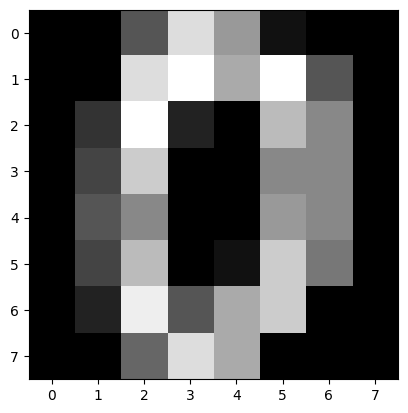

In [4]:
plt.imshow(digits.images[0], cmap='gray')

In [5]:
first_image = digits.images[0]
v0 = np.matrix.flatten(first_image)/15

In [6]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [7]:
result = random_classifier(v0)
result

array([0.03235295, 0.06464129, 0.11935268, 0.41481397, 0.19012345,
       0.86157938, 0.60530765, 0.23819791, 0.56092802, 0.32205358])

In [8]:
list(result).index(max(result))

5

In [9]:
digits.target[0]

0

In [10]:
def digit_image_flatten(img):
    return np.matrix.flatten(img) / 15.

In [11]:
def max_result(result):
    return list(result).index(max(result))

In [12]:
max_result(result)

5

In [13]:
len(digits.target)

1797

In [14]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]):
        v = digit_image_flatten(img)
        if max_result(classifier(v)) == target:
            correct += 1
    return correct / test_count     

In [15]:
test_digit_classify(random_classifier)

0.097

In [16]:
def average_image(i):
    imgs = [img for img, target in zip(digits.images[1000:], digits.target[1000:]) if target == i]
    return sum(imgs)/len(imgs)

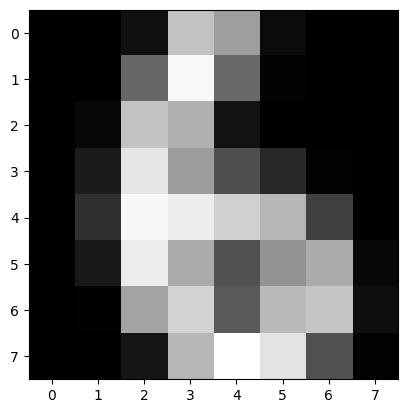

In [17]:
avg_img = average_image(6)
plt.imshow(avg_img, cmap='gray')

In [18]:
avg_digits = [np.matrix.flatten(average_image(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [19]:
max_result(compare_to_avg(v0))

0

In [20]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0 #<1>
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]): #<2>
        v = np.matrix.flatten(img) / 15. #<3>
        output = classifier(v) #<4>
        answer = list(output).index(max(output)) #<5>
        if answer == target:
            correct += 1 #<6>
    return (correct/test_count) #<7>

In [21]:
test_digit_classify(compare_to_avg)

0.853

### 16.4　用Python构建神经网络

In [22]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [23]:
class MLP():
    def __init__(self,layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m)
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]]
    
    def feed_forward(self, v):
        activations = []
        a = v
        activations.append(a)
        for weight, bias in zip(self.weights, self.biases):
            z = weight @ a + bias
            a = [sigmoid(x) for x in z]
            activations.append(a)
        return activations

    def evaluate(self, v):
        activations = self.feed_forward(v)
        return np.array(activations[-1])

In [24]:
nn = MLP([64, 16, 10])
v0 = digit_image_flatten(digits.images[0])
a = nn.evaluate(v0)
a

array([0.99993023, 0.99995459, 0.99946989, 0.9983468 , 0.99950604,
       0.99982057, 0.99945606, 0.99974192, 0.99824748, 0.99980012])

In [25]:
max_result(a)

1

In [26]:
test_digit_classify(nn.evaluate)

0.102

### 16.5.3　使用scikit-learn自动训练

In [43]:
x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]
(x.shape, y.shape)

((1000, 64), (1000,))

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(16,),
        activation = 'logistic',
        max_iter = 100,
        verbose = 10,
        random_state = 1,
        learning_rate_init = 0.1
    )

In [44]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), #<1>
                    activation='logistic', #<2>
                    max_iter=100, #<3>
                    verbose=10, #<4>
                    random_state=1, #<5>
                    learning_rate_init=.1) #<6>

In [45]:
mlp.fit(x, y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, max_iter=100, random_state=1, verbose=10)

In [65]:
v0

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [76]:
v0 = x[0]
# v1 = x[1]
mlp.predict([v0])

array([0])

In [92]:
def sklearn_trained_classify(v):
    return mlp.predict(v)

In [89]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0 #<1>
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]): #<2>
        v = np.matrix.flatten(img) / 15. #<3>
        # output = classifier([v]) #<4>
        # answer = list(output).index(max(output)) #<5>
        answer = classifier([v])[0]
        if answer == target:
            correct += 1 #<6>
    return (correct/test_count) #<7>

In [90]:
test_digit_classify(sklearn_trained_classfy)

1.0

In [98]:
def test_digit_classify(classifier,start=0, test_count=1000):
    correct = 0
    end = start + test_count
    for img, target in zip(digits.images[start:end], digits.target[start:end]): #<2>
        v = np.matrix.flatten(img) / 15.
        answer = classifier([v])[0]
        if answer == target:
            correct += 1 
    return (correct/test_count)

In [99]:
test_digit_classify(sklearn_trained_classify)

1.0

In [100]:
test_digit_classify(sklearn_trained_classify, start=1000, test_count=500)

0.962